In [58]:
import pandas as pd

df = pd.read_csv('my-encoded-data.csv')
df

,visitNumber,visitStartTime,isMobile,subContinent,country,region,metro,city,networkDomain,hits,...,Data Share,Data Share Promo,Retail (DO NOT EDIT owners nophakun and tianyu),test-liyuhz,(none),affiliate,cpc,cpm,organic,referral
0,1,1472830385,0,21,204,150,0,258,24932,1,...,0,0,0,0,0,0,0,0,1,0
1,1,1472880147,0,1,12,375,93,648,6673,1,...,0,0,0,0,0,0,0,0,1,0
2,1,1472865386,0,19,181,78,0,325,25841,1,...,0,0,0,0,0,0,0,0,1,0
3,1,1472881213,0,16,94,375,93,648,25841,1,...,0,0,0,0,0,0,0,0,1,0
4,2,1472822600,1,13,211,375,93,648,25841,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903648,1,1483554750,0,2,161,375,93,648,19523,17,...,0,0,0,0,0,0,0,0,0,1
903649,1,1483543798,1,18,182,375,93,648,25841,18,...,0,0,0,0,0,0,0,0,0,1
903650,1,1483526434,1,6,180,291,0,533,25841,24,...,0,0,0,0,0,0,0,0,0,1
903651,1,1483592864,0,16,94,375,93,648,25841,24,...,0,0,0,0,0,0,0,0,0,1


In [59]:
from datetime import datetime

df['visitHour'] = (df['visitStartTime'].apply(lambda x: str(datetime.fromtimestamp(x).hour))).astype(int)
df.drop(['visitStartTime'], axis=1, inplace=True)
print(sorted(df['visitHour'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [60]:
import numpy as np

df['transactionRevenue'] = df['transactionRevenue'].apply(lambda x: np.log1p(x))

In [61]:
y = df['transactionRevenue'] 
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
903648    0.0
903649    0.0
903650    0.0
903651    0.0
903652    0.0
Name: transactionRevenue, Length: 903653, dtype: float64

In [62]:
cols = df.columns.tolist()
cols.remove('transactionRevenue')
X = df[cols]
X

,visitNumber,isMobile,subContinent,country,region,metro,city,networkDomain,hits,pageviews,...,Data Share Promo,Retail (DO NOT EDIT owners nophakun and tianyu),test-liyuhz,(none),affiliate,cpc,cpm,organic,referral,visitHour
0,1,0,21,204,150,0,258,24932,1,1.0,...,0,0,0,0,0,0,0,1,0,8
1,1,0,1,12,375,93,648,6673,1,1.0,...,0,0,0,0,0,0,0,1,0,22
2,1,0,19,181,78,0,325,25841,1,1.0,...,0,0,0,0,0,0,0,1,0,18
3,1,0,16,94,375,93,648,25841,1,1.0,...,0,0,0,0,0,0,0,1,0,22
4,2,1,13,211,375,93,648,25841,1,1.0,...,0,0,0,0,0,0,0,1,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903648,1,0,2,161,375,93,648,19523,17,15.0,...,0,0,0,0,0,0,0,0,1,10
903649,1,1,18,182,375,93,648,25841,18,13.0,...,0,0,0,0,0,0,0,0,1,7
903650,1,1,6,180,291,0,533,25841,24,21.0,...,0,0,0,0,0,0,0,0,1,2
903651,1,0,16,94,375,93,648,25841,24,22.0,...,0,0,0,0,0,0,0,0,1,21


In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

In [64]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from sklearn.metrics import mean_squared_error

NN_model = Sequential()

# The Input Layer
NN_model.add(Dense(128, kernel_initializer='random_normal', input_dim = X_train.values.shape[1], activation='relu'))

# The Hidden Layers
NN_model.add(Dense(256, kernel_initializer='random_normal', activation='relu'))
NN_model.add(Dropout(0.01))
NN_model.add(Dense(256, kernel_initializer='random_normal', activation='relu'))
NN_model.add(Dropout(0.01))
NN_model.add(Dense(256, kernel_initializer='random_normal', activation='relu'))
NN_model.add(Dropout(0.01))
NN_model.add(Dense(256, kernel_initializer='random_normal', activation='relu'))
NN_model.add(Dropout(0.01))

# The Output Layer
NN_model.add(Dense(1, kernel_initializer='random_normal', activation='relu'))

# Compile the network
NN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
NN_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 128)               15744     
_________________________________________________________________
dense_47 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_20 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_21 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_22 (Dropout)         (None, 256)              

In [65]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='loss', mode='min', patience=3, restore_best_weights=True)

model_obj = NN_model.fit(X_train.values, y_train.values, epochs=100, batch_size=50000, 
                         validation_data=(X_val, y_val),
                         callbacks=[callback])

Epoch 1/100
11/11 [==============================] - 12s 863ms/step - loss: 677.2126 - mean_squared_error: 677.2126 - val_loss: 4.0043 - val_mean_squared_error: 4.0043
Epoch 2/100
11/11 [==============================] - 9s 848ms/step - loss: 4.1015 - mean_squared_error: 4.1015 - val_loss: 4.0043 - val_mean_squared_error: 4.0043
Epoch 3/100
11/11 [==============================] - 10s 898ms/step - loss: 4.1377 - mean_squared_error: 4.1377 - val_loss: 4.0043 - val_mean_squared_error: 4.0043
Epoch 4/100
11/11 [==============================] - 10s 900ms/step - loss: 4.1625 - mean_squared_error: 4.1625 - val_loss: 4.0043 - val_mean_squared_error: 4.0043
Epoch 5/100
11/11 [==============================] - 10s 906ms/step - loss: 4.1197 - mean_squared_error: 4.1197 - val_loss: 4.0043 - val_mean_squared_error: 4.0043


In [66]:
hyp = NN_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, hyp))

2.0003706891256483

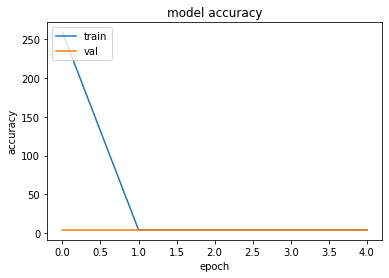

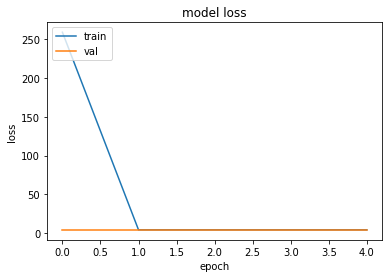

In [67]:
import matplotlib.pyplot as plt

plt.plot(model_obj.history['mean_squared_error'])
plt.plot(model_obj.history['val_mean_squared_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(model_obj.history['mean_squared_error'])
plt.plot(model_obj.history['val_mean_squared_error'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()